# Data Visualization

Data visualization is the graphical representation of information and data.

It's advantages include:



*   Serves as way to tell the story with the data we have (understand the data)
*   Identify trends and outliers
*   Easily sharing information.
*   Interactively explore opportunities.
*   Visualize patterns and relationships.



In [ ]:
## Mount to drive

In [1]:
## Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset and cheack the columns
data = pd.read_csv('train_LoanPrediction.csv')
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


## Common graphs and purpose

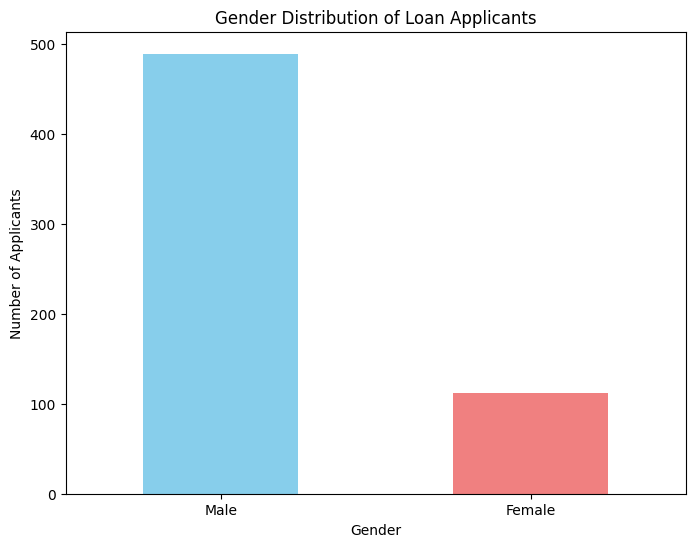

In [3]:
### Bar Chat
# Exercise 1: Gender Distribution
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Loan Applicants')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()

Analyze the graph

...

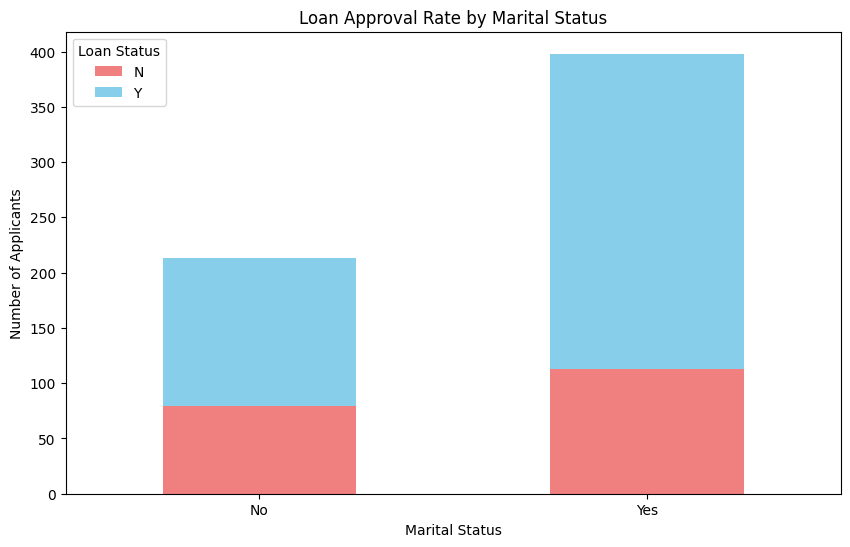

In [4]:
### Stacked bar chart

loan_status_by_married = pd.crosstab(data['Married'], data['Loan_Status'])

loan_status_by_married.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(10, 6))
plt.title('Loan Approval Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

Analyze

...

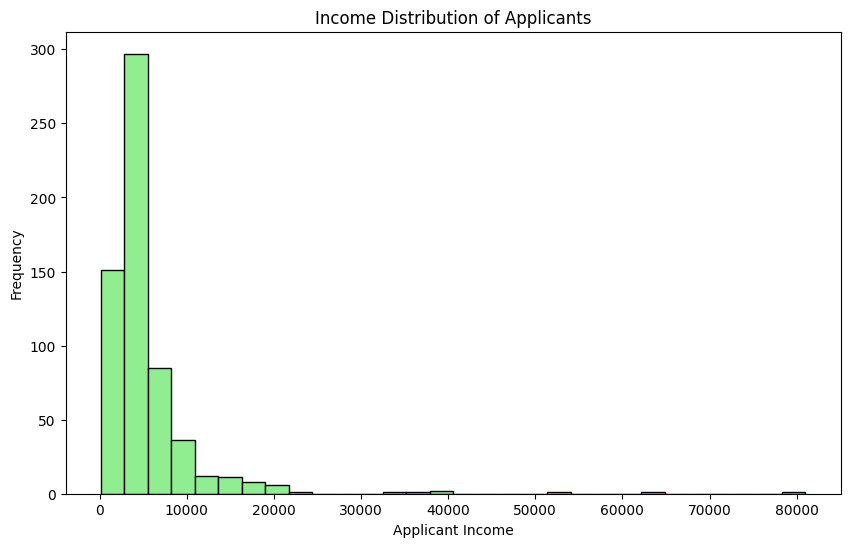

In [ ]:
### Histogram

plt.figure(figsize=(10, 6))
plt.hist(data['ApplicantIncome'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Income Distribution of Applicants')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

Analyze the graph

...

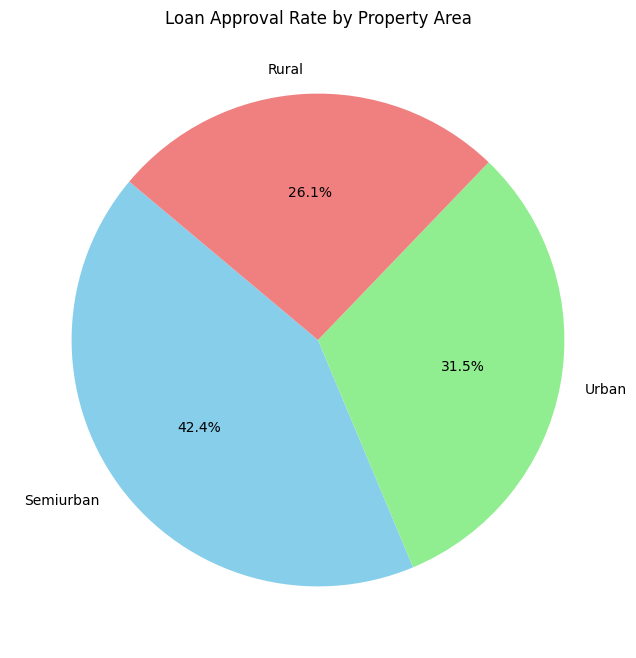

In [ ]:
### Area plot

loan_approval_by_area = data[data['Loan_Status'] == 'Y']['Property_Area'].value_counts()

plt.figure(figsize=(8, 8))
loan_approval_by_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Loan Approval Rate by Property Area')
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Loan_Status' column
data['Loan_Status_Encoded'] = label_encoder.fit_transform(data['Loan_Status'])

# Display the first few rows to confirm the encoding
print(data[['Loan_Status', 'Loan_Status_Encoded']].head())

  Loan_Status  Loan_Status_Encoded
0           Y                    1
1           N                    0
2           Y                    1
3           Y                    1
4           Y                    1


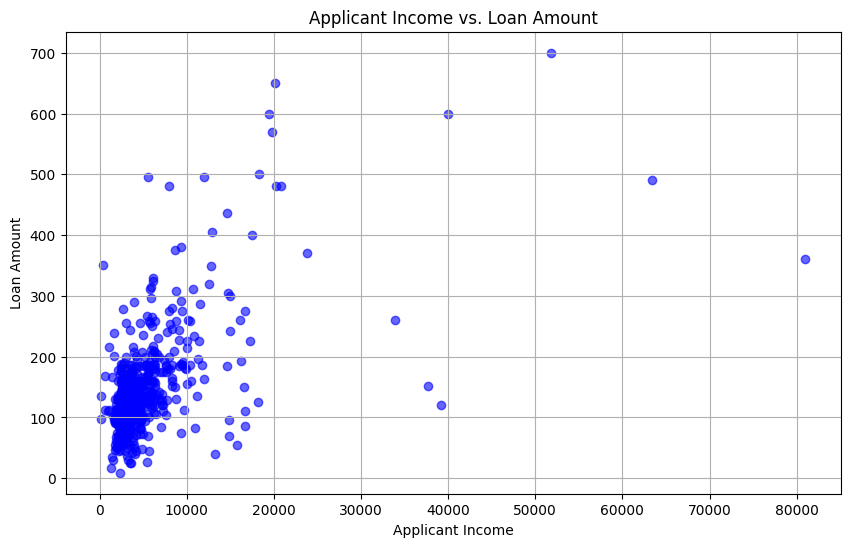

In [ ]:
##Scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.6, color='blue')
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

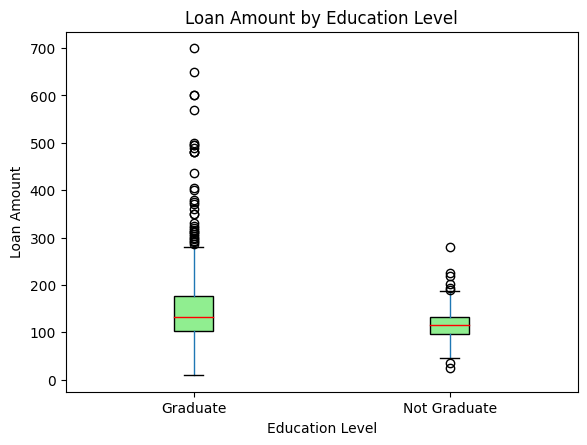

In [ ]:
 ### Box Whisker Plot

plt.figure(figsize=(10, 6))
data.boxplot(column='LoanAmount', by='Education', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='red'))

plt.title('Loan Amount by Education Level')
plt.suptitle('')
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.show()

Analyze the graph

...

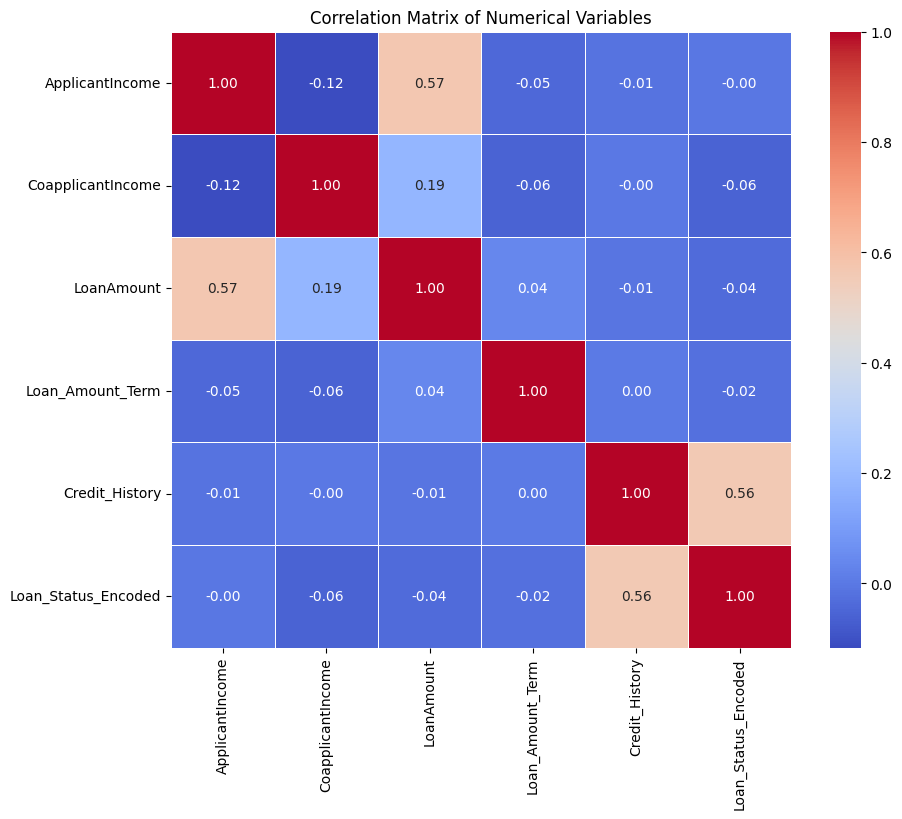

In [ ]:
## Heatmap

# Select only the numerical columns for the heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
corr_matrix_numerical = numerical_data.corr()

# Plotting the heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Analyze the graph

...

### Exercise

Solve the following


1. What is the average loan amount for applicants who are self-employed versus those who are not?
2. Is there a correlation between applicant income and the loan amount requested? Create a scatter plot to illustrate this relationship.
3. What percentage of applicants with a credit history got their loans approved?
4. Do applicants with dependents have a higher or lower loan approval rate compared to those without dependents?
5. Compare the average co-applicant income across different property areas using a bar chart.



C:\Users\eraco\AppData\Local\Temp\ipykernel_31948\4121937423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Self_Employed', y='LoanAmount', data=average_loan_amount, palette='viridis')


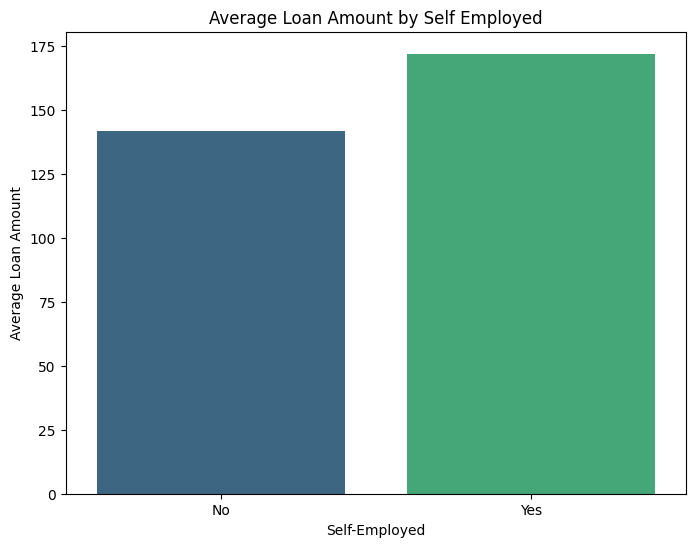

In [11]:
# 1. ### Bar Chart
average_loan_amount = data.groupby('Self_Employed')['LoanAmount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Self_Employed', y='LoanAmount', data=average_loan_amount, palette='viridis')

plt.title('Average Loan Amount by Self Employed')
plt.xlabel('Self-Employed')
plt.ylabel('Average Loan Amount')

plt.show()

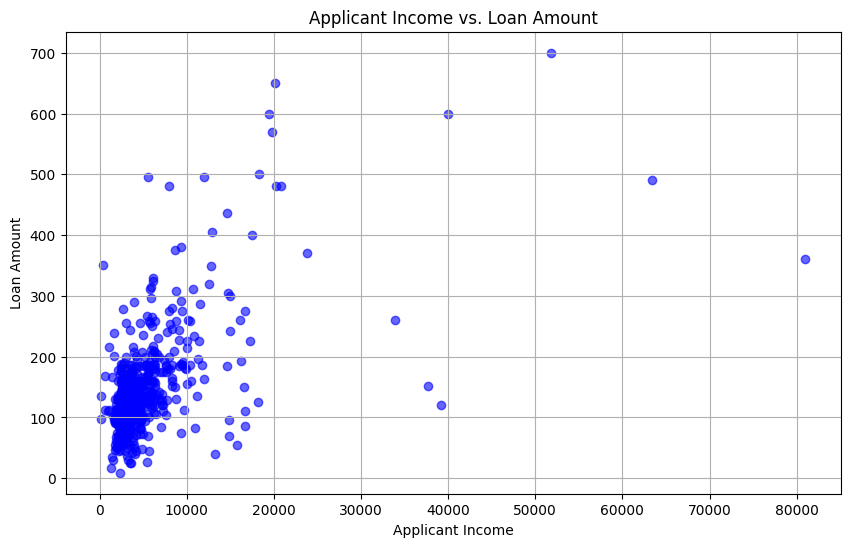

In [12]:
# 2.
##Scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.6, color='blue')
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

In [13]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

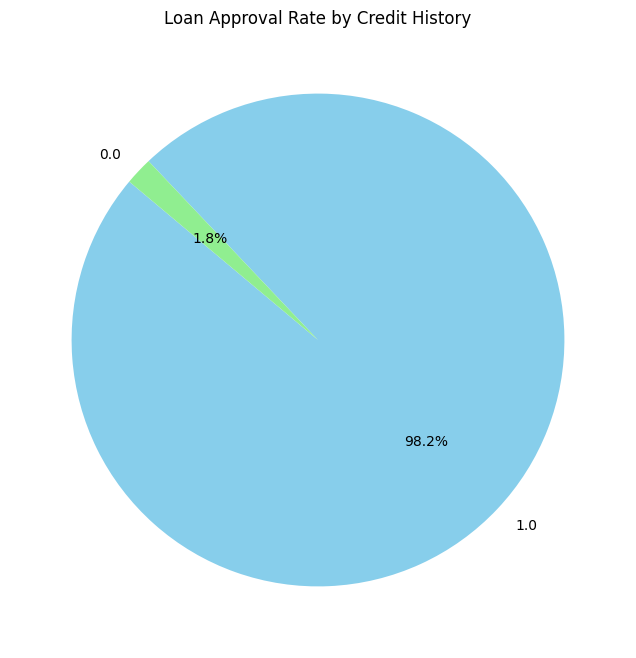

In [20]:
# 3. What percentage of applicants with a credit history got their loans approved?

### Area plot

loan_approval_by_area = data[data['Loan_Status'] == 'Y']['Credit_History'].value_counts()

plt.figure(figsize=(8, 8))
loan_approval_by_area.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Loan Approval Rate by Credit History')
plt.ylabel('')
plt.show()

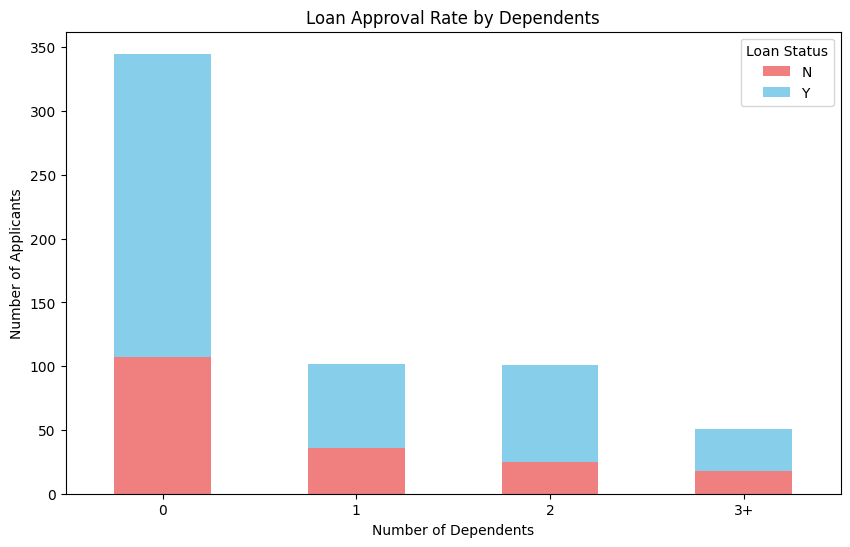

In [29]:
# 4. Do applicants with dependents have a higher or lower loan approval rate compared to those without dependents?

### Stacked bar chart

loan_status_by_married = pd.crosstab(data['Dependents'], data['Loan_Status'])

loan_status_by_married.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(10, 6))
plt.title('Loan Approval Rate by Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Loan Status')
plt.show()

<Figure size 1000x600 with 0 Axes>

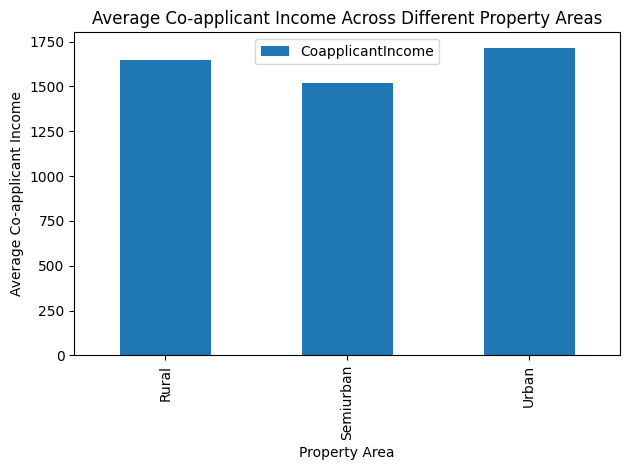

In [37]:
# 5. Compare the average co-applicant income across different property areas using a bar chart.

average_income = data.groupby('Property_Area')['CoapplicantIncome'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
average_income.plot(kind='bar', x='Property_Area', )

# Adding title and labels
plt.title('Average Co-applicant Income Across Different Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Average Co-applicant Income')
plt.tight_layout()

In [30]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')